<a href="https://colab.research.google.com/github/dtngx/ml_logbook_week3/blob/main/L7_ML_Logbook_Week_4_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?id=1tqYIvII8lJ_FnqE6ugS21n4s93kMwTLy' />

## Level-7 Machine Learning
## School of Computing and Engineering, University of West London

# Basics

Often data is stored in comma separated values (CSV) files.    For the remainder of this lab, we'll be working with [automobile data](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html), where we've extracted relevant parts below.

Note that CSV files can be output by any spreadsheet software, and are plain text, hence are a great way to share data. 

### Importing data with pandas

Now let's read in our automobile data as a pandas *dataframe* structure.  

In [ ]:
import pandas as pd

In [ ]:
# Importing drive method from colab for accessing google drive
from google.colab import drive

# Mounting drive
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in the csv files
dfcars=pd.read_csv("/content/drive/My Drive/Colab Notebooks/UWL/MSc-ML/mtcars.csv")
type(dfcars)

pandas.core.frame.DataFrame

In [ ]:
dfcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


What we have now is a spreadsheet with indexed rows and named columns, called a *dataframe* in pandas.  `dfcars` is an *instance* of the pd.DataFrame *class*, created by calling the pd.read_csv "constructor function".

The take-away is that `dfcars` is a dataframe object, and it has methods (functions) belonging to it. For example, `df.head()` is a method that shows the first 5 rows of the dataframe.

A pandas dataframe is a set of columns pasted together into a spreadsheet, as shown in the schematic below, which is taken from the cheatsheet above.  The columns in pandas are called *series* objects.

![](../images/pandastruct.png)

And we can produce a histogram from these values (more about plotting in next tutorial)

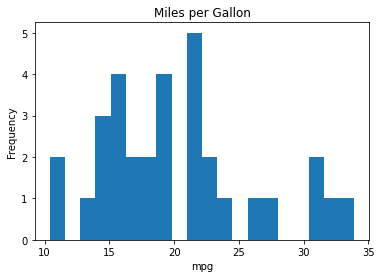

In [ ]:
# the .values isnt really need, a series behaves like a list for
# plotting purposes
import matplotlib.pyplot as plt
plt.hist(dfcars.mpg.values, bins=20);
plt.xlabel("mpg");
plt.ylabel("Frequency")
plt.title("Miles per Gallon");

# Exercise 2.1
Use Pandas to plot the same histogram

This is useful when you need to look into the sample distributions

In [ ]:
## Your code here

# Scatter plot
We often want to see co-variation among our columns, for example, miles/gallon versus weight. 

This can be done with a scatter plot.

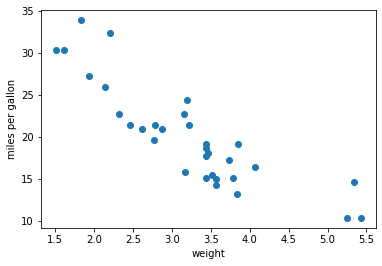

In [ ]:
plt.plot(dfcars.wt, dfcars.mpg, 'o');
plt.xlabel("weight");
plt.ylabel("miles per gallon");

# Exercise 2.2 Use `scatter`instead of `plot` to generate the same figure

In [ ]:
## Your code here

Suppose we'd like to save a figure to a file.  We do this by including the `savefig` command in the same cell as the plotting commands.  The file extension tells you how the file will be saved. 

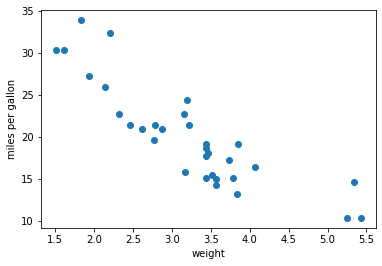

In [ ]:
plt.plot(dfcars.wt, dfcars.mpg, 'o')
plt.xlabel("weight");
plt.ylabel("miles per gallon");
plt.savefig('/content/drive/My Drive/Colab Notebooks/UWL/MSc-ML/foo1.pdf')
plt.savefig('/content/drive/My Drive/Colab Notebooks/UWL/MSc-ML/foo1.png', bbox_inches='tight') #less whitespace around image

And this is what the saved png looks like:

<img src='https://drive.google.com/uc?id=1WiyE-DRBkW3S2mw0oaW2Kfep0rj_ywpr'/>

<img src='https://drive.google.com/uc?id=12vatf59mSrSZRm9qAilr9YqwPdvXkI7b'/>

Below is a summary of the most commonly used `matplotlib` plotting routines.

<img src='https://drive.google.com/uc?id=1-RC3tdzVe21okrVtG-MOMNbLxZ51rD5U'/>

<img src='https://drive.google.com/uc?id=13z9h_d1yrGKGiRDLJ1ltrb6KWjh-3yB4'/>

# Linear Regression Tasks

In [ ]:
#Matrices, Dataframe and Plotting Operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Bikeshare dataset


In [ ]:
bikeshare = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UWL/MSc-ML/bikeshare.csv')
print("Length of Dataset:",len(bikeshare))
display(bikeshare.head())

Length of Dataset: 731


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
display(bikeshare.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**We can also use the groupby function to look at mean stats aggregated by month**

In [ ]:
bikeshare.groupby('mnth').mean()

,instant,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mnth,,,,,,,,,,,,,,
1,198.50000,1.000000,0.500000,0.048387,2.870968,0.645161,1.419355,0.236444,0.239796,0.585828,0.206303,194.225806,1982.112903,2176.338710
2,231.45614,1.000000,0.508772,0.035088,3.000000,0.684211,1.368421,0.299226,0.299731,0.567465,0.215684,262.508772,2392.789474,2655.298246
3,258.00000,1.354839,0.500000,0.000000,3.096774,0.725806,1.451613,0.390539,0.381954,0.588475,0.222699,716.838710,2975.419355,3692.258065
4,288.50000,2.000000,0.500000,0.033333,3.000000,0.666667,1.416667,0.469999,0.457081,0.588063,0.234482,1013.366667,3471.533333,4484.900000
5,319.00000,2.000000,0.500000,0.032258,2.903226,0.693548,1.403226,0.594798,0.565662,0.688958,0.182989,1214.274194,4135.500000,5349.774194
6,349.50000,2.333333,0.500000,0.000000,3.100000,0.716667,1.233333,0.684097,0.638246,0.575806,0.185420,1231.766667,4540.600000,5772.366667
7,380.00000,3.000000,0.500000,0.032258,2.935484,0.661290,1.193548,0.755470,0.704094,0.597876,0.166059,1260.596774,4303.080645,5563.677419
8,411.00000,3.000000,0.500000,0.000000,3.000000,0.741935,1.306452,0.708582,0.651475,0.637730,0.172918,1161.919355,4502.500000,5664.419355
9,441.50000,3.266667,0.500000,0.033333,3.050000,0.666667,1.500000,0.616485,0.579299,0.714714,0.165945,1172.050000,4594.466667,5766.516667


# Exercise 2.3 Plot the variation of **count** versus **month**. Is  there a seasonal change?

In [ ]:
## Your code here

## We can also scatter plot Temp vs. A-Temp.

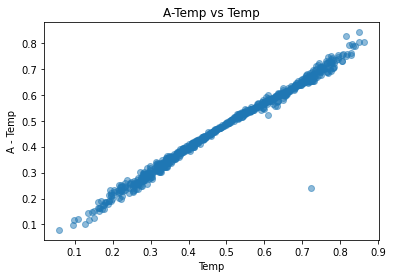

In [ ]:
plt.plot(bikeshare['temp'], bikeshare['atemp'],'o', alpha =0.5)
plt.xlabel('Temp')
plt.ylabel('A - Temp')
plt.title('A-Temp vs Temp')
plt.show()

Clean the data by removing the "weird" point

In [ ]:
display(bikeshare[(bikeshare['temp']>0.7) & (bikeshare['atemp']<0.3)])

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
594,595,2012-08-17,3,1,8,0,5,1,1,0.723333,0.2424,0.570833,0.231354,1483,5665,7148


In [ ]:
bikeshare= bikeshare.drop([594])

In [ ]:
display(bikeshare[(bikeshare['temp']>0.7) & (bikeshare['atemp']<0.3)])

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


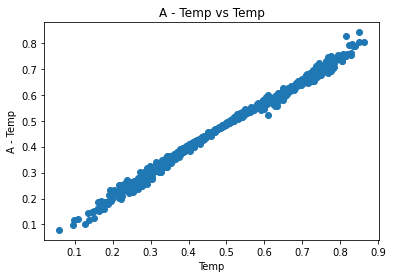

In [ ]:
new = bikeshare.sort_values(['temp','atemp'])
plt.plot(new['temp'], new['atemp'],'o')
plt.xlabel('Temp')
plt.ylabel('A - Temp')
plt.title('A - Temp vs Temp')
plt.show()

## Split up the data into a training set and a test set using the 'train_test_split' function from sklearn:

Having an idea of what the data looks like, we want to predict count. We will be breaking up the data into a **training** and a **testing** set. The **training** set will be used to train the model, while the **testing** set will be used to quantify how well our model does. The **testing** set is a way for us to ensure our model doesn't overfit our training data.

**Let us first create a function that will randomly split the data up into a 70-30 split, with 70% of the data going into the training set:**

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(new, test_size=0.30, random_state=42)

print("Length of Training set = ",len(train_data))
print("Length of Testing set  = ",len(test_data))

Length of Training set =  511
Length of Testing set  =  219


# Linear Regression


Now, we will fit the data with Linear Regression model. We will use the same training/testing dataset and create our linear regression objects.

In [ ]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import statsmodels.api as sm

#Split Data into X,Y
x_train, y_train = train_data['temp'], train_data['atemp']
x_test, y_test = test_data['temp'], test_data['atemp']

#Add constant
x_train_ca = sm.add_constant(x_train)
x_test_ca = sm.add_constant(x_test)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Fit a Linear Regression model using statsmodels and print out the coefficients of `temp` and `const`**

*Hint*: StatsModels use a Y followed by X structure while feeding data in contrast to sklearn that uses X followed by Y.

Give the name *results* to your fit model

In [ ]:
model = sm.OLS(y_train, x_train_ca)
results = model.fit()
print(results.params)

const    0.035490
temp     0.886722
dtype: float64


# Exercise 2.4

In [ ]:
# Plotting our model
fig, axes = plt.subplots(1,2,figsize=(20,6))
axes = axes.ravel()

## Insert your code here to make the snippet complete

for i, ax in enumerate(axes):
    ax.set_ylim(0,1)
    ax.set_xlabel('Temperature')
    ax.set_ylabel('# of Rides')
    ax.legend()

NameError: ignored

In [ ]:
# Metrics, Performance Evaluation and Helpful functions

from sklearn import metrics

# To compute the mean squared error (notice that we are now using the TEST set):
#
print("R^2 Score for Linear Regression (Training):", metrics.r2_score(y_train, results.predict(x_train_ca)))
print("R^2 Score for Linear Regression (Testing) :", metrics.r2_score(y_test, results.predict(x_test_ca)))

R^2 Score for Linear Regression (Training): 0.9927802291436597
R^2 Score for Linear Regression (Testing) : 0.9940619535647642


**Check out `results.summary()` and pay close attention to the table that shows up**

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  atemp   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 6.999e+04
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:44:19   Log-Likelihood:                 1456.8
No. Observations:                 511   AIC:                            -2910.
Df Residuals:                     509   BIC:                            -2901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0355      0.002     19.774      0.000       0.032       0.039
temp           0.8867      0.003    264.560      0.000       0.880       0.893
==============================================================================
Omnibus:                       25.835   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.740
Skew:                          -0.294   Prob(JB):                     5.82e-12
Kurtosis:                       4.444   Cond. No.                         6.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Confidence Intervals

In Data Science, a confidence interval (CI) is a type of interval estimate, computed from the statistics of the observed data, that might contain the true value of an unknown population parameter. Simply speaking, a Confidence Interval is a range of values we are fairly sure our true value lies in. 

It is important to remind ourselves here that Confidence Intervals belong to a parameter and not a statistic. Thus, they represent the window in which the true value exists for the entire population when all we have is a sample.

<figure>
<left>
<img src='https://drive.google.com/uc?id=1qmG1dUHlJ0dKuVz1OxCXuKMPuEnW_Kk0' />
</figure>

**See if you can implement a 95% confidence interval using statsmodels**

In [ ]:
# Confidence Interval using Stats Model Summary
thresh = 0.05
intervals = results.conf_int(alpha=thresh)

# Renaming column names
first_col = str(thresh/2*100)+"%"
second_col = str((1-thresh/2)*100)+"%"
intervals = intervals.rename(columns={0:first_col,1:second_col})
display(intervals)

,2.5%,97.5%
const,0.031964,0.039016
temp,0.880137,0.893307


In the above block of code, ```results.conf_int(alpha=thresh)``` returns a dataframe with columns 0 and 1. We explained Confidence Intervals above where because we assume normal symetric distribution of data, the 95% Confidence Interval means there's 2.5% chance of the true value lying below the values in Column 0 and 2.5% chance of the true value lying above Column 1. 